In [1]:
import sys
import localSettings as ls
print(ls.main_path)

/Users/elenag/Desktop/PlotterLEE/PELEE/


In [2]:
main_path = ls.main_path
sys.path.append(main_path)

In [3]:
from datetime import datetime
now = datetime.now()
date_time = now.strftime("%m%d%Y")
print("date and time:",date_time)

date and time: 05062020


In [4]:
import plotter
import importlib
importlib.reload(plotter)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward

params = {
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large'
}
pylab.rcParams.update(params)

In [5]:
tree = "NeutrinoSelectionFilter"

BNB = 'neutrinoselection_filt_run1_NuMI_beamon'+ls.APPEND
EXT = 'neutrinoselection_filt_run1_NuMI_ext'+ls.APPEND #Run1 + Run2
NU  = 'neutrinoselection_filt_run1_NuMI_overlay'+ls.APPEND
NUE = 'neutrinoselection_filt_run1_NuMI_overlay'+ls.APPEND
DRT = 'neutrinoselection_filt_run1_NuMI_dirt'+ls.APPEND
#BNB = 'numi_neutrinoselection_run1_beamon_set0'+ls.APPEND
#EXT = 'numi_neutrinoselection_run1_beamoff_set0'+ls.APPEND #Run1 + Run2


mc   = uproot.open(ls.ntuple_path+NU +".root")[ls.fold][tree]
nue  = uproot.open(ls.ntuple_path+NUE+".root")[ls.fold][tree]
data = uproot.open(ls.ntuple_path+BNB+".root")[ls.fold][tree]
ext  = uproot.open(ls.ntuple_path+EXT+".root")[ls.fold][tree]
dirt = uproot.open(ls.ntuple_path+DRT+".root")[ls.fold][tree]
#lee = uproot.open(ls.ntuple_path+NUE+".root")[ls.fold][tree]

#uproot_v = [lee,mc,ncpi0,ccpi0,ccnopi,cccpi,ncnopi,nccpi,nue,ext,data,dirt]
uproot_v = [mc,nue,ext,data,dirt]
#uproot_v = [ext,data]

variables = [
    "shr_dedx_Y", "shr_bkt_pdg", "p", "pt", "selected", "nu_pdg", "shr_theta",
    "slpdg", "trk_score_v", "backtracked_pdg", # modified from shr_score_v
    "shr_pfp_id_v", "category",
    "shr_tkfit_dedx_U","shr_tkfit_dedx_V","shr_tkfit_dedx_Y",
    "shr_tkfit_gap10_dedx_U","shr_tkfit_gap10_dedx_V","shr_tkfit_gap10_dedx_Y",
    "shr_tkfit_2cm_dedx_U","shr_tkfit_2cm_dedx_V","shr_tkfit_2cm_dedx_Y",
    "topological_score",
    "shr_energy_tot", 
    "trk_energy_tot", "shr_hits_tot", "ccnc", "trk_chipr",
    "trk_bkt_pdg", "hits_ratio", "n_tracks_contained", 
    "crtveto","crthitpe",
    "NeutrinoEnergy2",
    "run","sub","evt",
    "CosmicIP","CosmicDirAll3D","CosmicIPAll3D",
    "nu_flashmatch_score","best_cosmic_flashmatch_score","best_obviouscosmic_flashmatch_score",
    #"trk_pfp_id",
    "shrmoliereavg","shrmoliererms",
    "shr_tkfit_npointsvalid","shr_tkfit_npoints", # fitted vs. all hits for shower
    "shrclusfrac0","shrclusfrac1","shrclusfrac2", # track-fitted hits / all hits
    "trkshrhitdist2", # "trkshrhitdist0","trkshrhitdist1", distance between track and shower in 2D
    "shrsubclusters0","shrsubclusters1","shrsubclusters2", # number of sub-clusters in shower
    "trk_llr_pid_score_v", # trk-PID score
    "trk_energy_proton_v", # track energy under proton hyp
    "trk_calo_energy_y_v", # track calo energy
    "pi0_energy2_Y", # pi0 tagger variables
    "_opfilter_pe_beam", "_opfilter_pe_veto", # did the event pass the common optical filter (for MC only)
    "reco_nu_vtx_sce_x","reco_nu_vtx_sce_y","reco_nu_vtx_sce_z",
    "nproton", "nu_e", "n_showers_contained", "shr_distance", "trk_distance",
    "hits_y", "shr_pz", "shr_energy", "shr_dedx_U", "shr_dedx_V", "shr_phi", "trk_phi", "trk_theta",
    "shr_tkfit_dedx_U", "shr_tkfit_dedx_V", "run", "sub", "evt", "nproton", "trk_pid_chipr_v",
    #"trk_len", "mc_pdg", "slnunhits", "slnhits", "shr_score", "trk_score", "trk_hits_tot",
    #"true_e_visible", "matched_E", "shr_bkt_E", "trk_bkt_E", "trk_energy", "tksh_distance", "tksh_angle",
    #"npi0","npion","pion_e","muon_e","pi0truth_elec_etot",
    ##"anglediff_Y",
    "pi0_e", "shr_energy_tot_cali", "shr_dedx_Y_cali", "evnunhits", "nslice", "interaction",
    #"slclustfrac", "reco_nu_vtx_x", "reco_nu_vtx_y", "reco_nu_vtx_z","contained_fraction",
    #"secondshower_Y_nhit","secondshower_Y_vtxdist","secondshower_Y_dot","secondshower_Y_dir","shrclusdir2",
    #"shr_tkfit_nhits_Y","shr_tkfit_nhits_U","shr_tkfit_nhits_V",
    #"shr_tkfit_2cm_nhits_Y","shr_tkfit_2cm_nhits_U","shr_tkfit_2cm_nhits_V",
    #"shr_tkfit_gap10_nhits_Y","shr_tkfit_gap10_nhits_U","shr_tkfit_gap10_nhits_V",
    "pfnhits","pfnunhits"
]
#make the list unique
variables = list(set(variables))
print(variables)

    
WEIGHTS = ["weightSpline","weightSplineTimesTune"]#, "weightTune", weightsGenie", "weightsFlux", "weightsReint"]
WEIGHTSLEE = ["weightSpline", "leeweight", "weightSplineTimesTune"]#,"weightTune", weightsGenie", "weightsFlux", "weightsReint"]
MCFVARS = []#"mcf_nu_e","mcf_lep_e","mcf_actvol","mcf_nmm","mcf_nmp","mcf_nem","mcf_nep","mcf_np0","mcf_npp",
           #"mcf_npm","mcf_mcshr_elec_etot","mcf_pass_ccpi0","mcf_pass_ncpi0",
           #"mcf_pass_ccnopi","mcf_pass_ncnopi","mcf_pass_cccpi","mcf_pass_nccpi"]
SYSTEMATICS = []#  ['weightsFlux','weightsGenie']

nue  = nue.pandas.df(variables + WEIGHTS + SYSTEMATICS, flatten=False)
mc   = mc.pandas.df(variables + WEIGHTS + MCFVARS + SYSTEMATICS, flatten=False)
data = data.pandas.df(variables, flatten=False)
ext  = ext.pandas.df(variables, flatten=False)
dirt = dirt.pandas.df(variables + WEIGHTS + SYSTEMATICS, flatten=False)
#lee = lee.pandas.df(variables + WEIGHTSLEE + SYSTEMATICS, flatten=False)

['shrsubclusters0', 'pt', 'shr_theta', 'selected', 'sub', 'reco_nu_vtx_sce_x', 'trk_score_v', 'shr_tkfit_npoints', 'shrclusfrac1', 'CosmicDirAll3D', 'ccnc', 'shr_hits_tot', 'pi0_e', 'backtracked_pdg', 'shr_pz', 'evt', 'shr_tkfit_dedx_V', 'interaction', 'shr_tkfit_gap10_dedx_Y', 'category', 'shr_tkfit_npointsvalid', 'shr_tkfit_gap10_dedx_U', 'shr_tkfit_2cm_dedx_Y', 'shrsubclusters1', 'trk_distance', 'crthitpe', 'shr_tkfit_dedx_Y', 'pi0_energy2_Y', '_opfilter_pe_beam', 'shr_phi', 'nu_e', 'best_cosmic_flashmatch_score', 'shrsubclusters2', 'shr_tkfit_dedx_U', 'shrmoliereavg', 'shr_dedx_Y_cali', 'trk_energy_tot', 'trk_theta', 'shrclusfrac0', 'trk_phi', 'best_obviouscosmic_flashmatch_score', 'nslice', 'shr_tkfit_2cm_dedx_V', 'trk_pid_chipr_v', 'shr_tkfit_2cm_dedx_U', 'shr_energy', 'run', 'CosmicIP', 'pfnhits', 'trk_bkt_pdg', 'n_showers_contained', 'crtveto', '_opfilter_pe_veto', 'reco_nu_vtx_sce_z', 'nu_flashmatch_score', 'shr_distance', 'trk_calo_energy_y_v', 'hits_ratio', 'shr_dedx_U', 'sh

In [6]:
#import pandas as pd
#removeDf = pd.read_csv(ls.ntuple_path+'pre_1970_runs_subruns.txt', sep=" ", header=None)
#removeDf.columns = ["run", "sub"]
#removeCol = removeDf.apply(lambda x: str(x['run']) +'.'+str(x['sub']), axis=1 )
#data['rem'] = data.apply(lambda x: str(x['run']) +'.'+str(x['sub']), axis=1 )
#ext['rem']  = ext.apply(lambda x: str(x['run']) +'.'+str(x['sub']), axis=1 )
#print(ext.loc[ext['run']==7586,'sub'].tolist())

#print(data.shape,ext.shape)
#print(data['rem'])

#data = data.loc[data['rem'].isin(removeCol)==False,:]
#ext  = ext .loc[ext['rem'].isin(removeCol)==False,:]
#print(data.shape,ext.shape)

In [7]:
df_v = [mc,nue,dirt]


for i,df in enumerate(df_v):
    ##df['weightSplineTimesTune' ] = 1.
    ##df.loc[ df['weightTune'] <= 0, 'weightTune' ] = 1.
    ##df.loc[ df['weightTune'] == np.inf, 'weightTune' ] = 1.
    ##df.loc[ df['weightTune'] > 100, 'weightTune' ] = 1.
    ##df.loc[ np.isnan(df['weightTune']) == True, 'weightTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] <= 0, 'weightSplineTimesTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] == np.inf, 'weightSplineTimesTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] > 100, 'weightSplineTimesTune' ] = 1.
    df.loc[ np.isnan(df['weightSplineTimesTune']) == True, 'weightSplineTimesTune' ] = 1.
#   # #df['weightSpline']  = df['weightSpline']  * df['weightTune']
#    ##df.loc[ df['npi0'] > 0, 'weightSplineTimesTune' ] = df['weightSpline'] * df['weightTune'] * 0.7 #scale down pi0s

In [8]:
import plotter
import importlib
importlib.reload(plotter)

<module 'plotter' from '/Users/elenag/Desktop/PlotterLEE/PELEE/plotter.py'>

In [11]:
nue = mc.query("(abs(nu_pdg) == 12 & ccnc == 0)")
samples = {
    "mc": mc,
    "nue": nue,
    "dirt": dirt,
    "data": data,
    "ext": ext
}

scaling = 1
#data pot from Zarko 4.801e+19
#mc   pot from Krish 1.26178e+20      data/ mc   = 0.38049422244
#dirt pot from Krish 6.4e20           data/ dirt = 0.075015625
# Data/Ext = 1123435.0/2040193.0 = 0.550651335
pot = 4.831e+19
mcratio   = pot/1.26178e20 
dirtratio = pot/6.4e20 
extratio  = 1123435.0/2987202.8600
SPLIT = 1.0

weights = { #full sample mc = 0.38
            "mc"  : mcratio  * SPLIT * scaling,   
            "nue" : mcratio  * SPLIT * scaling,  
            "ext" : extratio * SPLIT * scaling, #set0   
            "dirt": dirtratio* SPLIT * scaling, #set0   
}

my_plotter = plotter.Plotter(samples, weights, pot=pot)
print(weights)

{'mc': 0.3828718160059598, 'nue': 0.3828718160059598, 'ext': 0.3760825938684325, 'dirt': 0.075484375}


Profile likelihood: 0.00 sigma @ 1.01e21 POT
s/sqrt(b): 0.00 sigma @ 1.01e21 POT


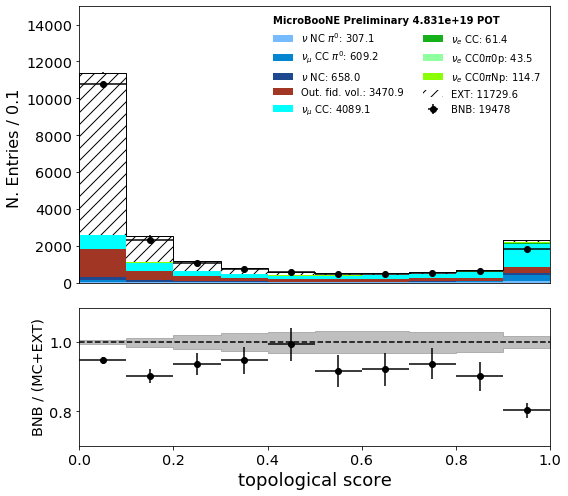

In [14]:
miniboone_bins = [
    0, 0.200, 0.300, 0.375, 0.475, 0.550, 0.675, 0.800, 0.950, 1.100, 1.300,
    1.500, 3.000
]

#QUERY += " & pi0truth_elec_etot<15 & npi0 == 0 & ccnc == 0"
#QUERY += " & muon_e>0.3 & npi0 == 0 & ccnc == 0"
#QUERY = "(muon_e<0.3 | pi0truth_elec_etot>=15) & npi0 == 0 & npion == 0 & ccnc == 0 & nu_pdg == 14 & category == 2"
#QUERY += " & ~((muon_e<0.3 | pi0truth_elec_etot>=15) & npi0 == 0 & npion == 0 & ccnc == 0 & nu_pdg == 14 & category != 5)"

VARIABLE, BINS, RANGE, XTIT = 'topological_score',10,(0,1),r"topological score"
#VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_y',25,(-125,125),r"reco nu vtx Y pos [cm]"
#VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_x',26,(0,260),r"reco nu vtx X pos [cm]"

#VARIABLE, BINS, RANGE, XTIT = 'pi0_mass_Y',20,(0,500),"pi0 mass Y"

#VARIABLE, BINS, RANGE, XTIT = 'muon_e',20,(0.,1.),r"Muon Energy [GeV]"
#VARIABLE, BINS, RANGE, XTIT = 'pi0truth_elec_etot',20,(0.,60),r"Michel Energy [GeV]"

fig, ax1, ax2 = my_plotter.plot_variable(
    VARIABLE,   
    query='nslice==1',
    kind="event_category",
    #kind="interaction",
    #kind="sample",
    #kind='particle_pdg',
    draw_sys=False,
    stacksort=3,
    title=XTIT,
    #bins=asymm_bins,
    bins=BINS,
    range=RANGE
)[0:3]

print("Profile likelihood: %.2f sigma @ 1.01e21 POT" % my_plotter.significance_likelihood)
print("s/sqrt(b): %.2f sigma @ 1.01e21 POT" % my_plotter.significance)

#ax1.set_ylim(0,40)
#ax1.set_yscale("log")
#ax1.set_ylim(0,200)
ax1.set_ylim(0,ax1.get_ylim()[1]*1.25)
ax2.set_ylim(0.7,1.1)
fig.savefig(ls.plots_path+"run1/presel/"+VARIABLE+"_"+date_time+".pdf")

In [ ]:
data.query(QUERY)[["run","sub","evt","reco_e"]]